# **6. Logistic Regression I - Binary Classification**

Linear Regression can be used to predict continuous variables such as:
1. Home Price
2. Weather
3. Stock Prices

But what about the following?
1. Whether an email is a spam or not
2. Will a customer buy a product
3. Which party will a voter vote for

The predicted value $Y$ in each of the above case is a **Categorical** variable.

**Categorical** variables are of two (2) types:
1. Binary Classification - Simple Yes/No (or 0/1)
2. Multiclass Classification - More than 2 Categories (Republic/Democrat/Independent)

Consider the following example which looks at whether or not a person will buy insurance based on their age.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/7_logistic_reg/insurance_data.csv"
df = pd.read_csv(url)
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0.5, 1.0, 'Insurance vs Age with Linear Probability Fitting')

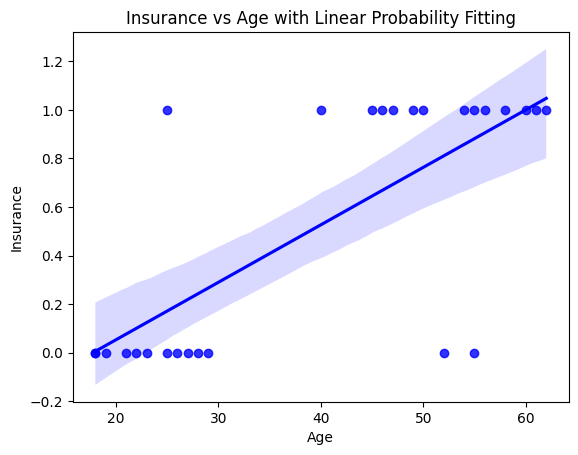

In [3]:
# Let's plot
sns.regplot(x = 'age', y = 'bought_insurance', data = df, color = "blue")
plt.xlabel('Age')
plt.ylabel('Insurance')
plt.title('Insurance vs Age with Linear Probability Fitting')

## **Q. What is wrong with the above plot?**

The above linear model seems like a pretty good fit, but something is wrong with it - he Linear Probability Model (LPM as known) exceeds the probability bounds of [0, 1]. Therefore, it the incorrect model to use, to try and fit categorical variables

When modeling Binary Response variables, we are sort of modeling the probability with which said reponse occurs. The appropriate function for this is the **Sigmoid** function, which is define as below:

$$
P(Y = 1 \mid X) = \frac{1}{1 + e^{-(B_0 + B_1 X)}}
$$

Here, instead of predicting whether Y = 0 (No) or Y = 1 (Yes), we are trying to predict the value with which Y takes on 0 or 1.

In [4]:
# 1. Create X and Y columns
X = df[['age']]
Y = df['bought_insurance']

In [5]:
# 2. Create test-train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [6]:
# 3. Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([[0.112778]]), array([-4.20278276]))

In [ ]:
# 4. Predict
y_pred = model.predict(X_test)

In [ ]:
# 5. Check model accuracy
model.score(X_test, y_test)

1.0

Text(0.5, 1.0, 'Insurance vs Age Logistic Regression Fit')

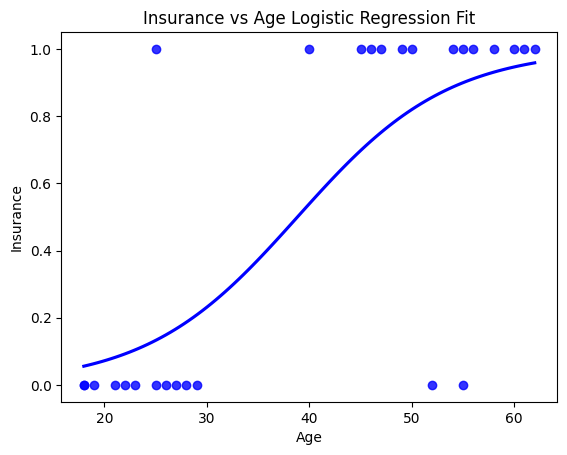

In [ ]:
# 6. Plot
sns.regplot(x = 'age', y = 'bought_insurance', data = df, color = "blue", logistic = True, ci = None)
plt.xlabel('Age')
plt.ylabel('Insurance')
plt.title('Insurance vs Age Logistic Regression Fit')

In [26]:
# Exercise: Employee attrition database
url2 = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv"
df2 = pd.read_csv(url2)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [27]:
# Create dummy variables for Department
dummies_dep = pd.get_dummies(df2['Department'])
dummies_dep.head()



,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False


In [28]:
# Drop 'Department_IT' to avoid dummy variable trap
merged_df2 = pd.concat([df2, dummies_dep], axis = 1)
merged_df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,sales,medium,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,sales,low,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,False,False,False,False,False,False,False,True,False,False


In [29]:
# Drop Department and IT to avoid Dummy Variable Trap
merged_df2.drop(['Department', 'IT'], axis = 1, inplace = True)
merged_df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,True,False,False


In [31]:
# Now do the same with Salary:
  # 1. Create dummy variables for salary
  # 2. Merge the dummy variables with the original dataframe
  # 3. Drop the original 'Salary' column and one of the DV columns to avoide DV Trap

dummies_salary = pd.get_dummies(df2['salary'])
merged_df2 = pd.concat([merged_df2, dummies_salary], axis = 1)
merged_df2.drop(['salary', 'medium'], axis = 1, inplace = True)
merged_df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,False,True
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,False
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,False
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,False,True
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,False,True


In [32]:
# Create a test-train split, with 'left' as the predicted variable
X = merged_df2.drop('left', axis = 1)
Y = merged_df2['left']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [33]:
# Fit/train a logistic model using the X_train and y_train datasets
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[-4.05851342,  0.38691614, -0.30003044,  0.00461084,  0.27214533,
         -1.44977584, -0.56550777, -0.6300944 ,  0.11254513,  0.4522762 ,
         -0.40793291,  0.01971958,  0.06032068,  0.06325335,  0.35594473,
          0.27343597, -1.4506627 ,  0.49891703]]),
 array([-0.12958947]))

In [34]:
# Predict
y_pred = model.predict(X_test)

In [35]:
# Check model score
model.score(X_test, y_test)

# The model scores about 78%; not as accurate as we'd like for it to be

0.7856666666666666